# Card games

this notebook examines a couple different results in the context of playing cards. The card deck file can be found [here](https://github.com/michaelneuder/numerical_experiments/blob/master/blackjack/card_deck.py).

In [69]:
from card_deck import deck
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams["font.size"] = "20"

The first thing I want to explore is extremely simple. I want to use repititive random sampling to estimate the probability of being dealt a score of 21 in the poker game Black Jack. This can quite simply be calculated deterministically as:
$$\frac{16}{52} \cdot \frac{4}{51} + \frac{4}{52} \cdot \frac{16}{51} = \frac{128}{2652} \approx .0483.$$
Lets see how close we can get to that with repeated random sampling.

In [50]:
def score_hand_blackjack(hand):
    vals = hand[0][0], hand[1][0]
    score = 0
    for val in vals:
        if val > 10:
            score += 10
        elif val == 1:
            score += 11
        else:
            score += val
    return score

In [59]:
def simulate_blackjack(trials):
    hand_frequency = np.zeros((13,13))
    cards = deck(start_shuffled = False)
    num_trials = trials
    num_blackjacks = 0
    for i in range(num_trials):
        cards.shuffle()
        hand = cards.deal(2)
        hand_frequency[hand[0][0]-1, hand[1][0]-1] += 1
        score = score_hand_blackjack(hand)
        if score == 21:
            num_blackjacks += 1
    return num_blackjacks / num_trials, hand_frequency

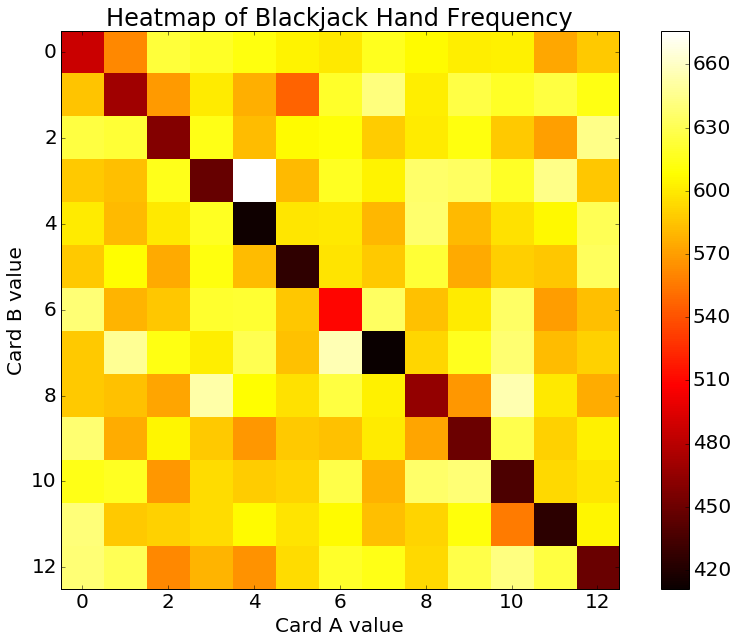

In [72]:
trials = 100000
probs, freqs = simulate_blackjack(trials)
plt.imshow(freqs, cmap='hot', interpolation='nearest')
plt.xlabel('Card A value')
plt.ylabel('Card B value')
plt.title('Heatmap of Blackjack Hand Frequency')
plt.colorbar()
plt.show()

In [74]:
print(probs)

0.04898
